In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('crabs.txt', sep = '\s+')

In [4]:
df.head()

,presz,postsz,inc,year,lf
0,113.6,127.7,14.1,NaN,0
1,118.1,133.2,15.1,NaN,0
2,119.9,135.3,15.4,NaN,0
3,126.2,143.3,17.1,NaN,0
4,126.7,139.3,12.6,NaN,0


### 1. Vẽ đồ thị scatter plot thể hiện mối tương quan giữa postmolt và premolt

Text(0.5, 1.0, 'Postmost vs Premolt')

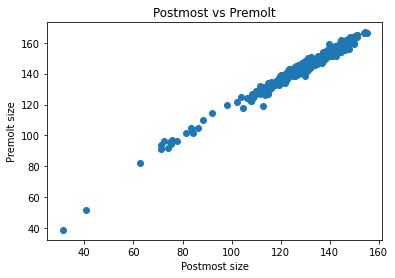

In [9]:
plt.plot(df['presz'],df['postsz'], 'o');
plt.xlabel('Postmost size')
plt.ylabel('Premolt size')
plt.title('Postmost vs Premolt')

### 2.Tính hệ số tương quan

In [11]:
print('he so tuong quan', pearsonr(df['postsz'],df['presz']))

he so tuong quan (0.9903699282533854, 0.0)


### 3.Tìm phương trình hồi quy

In [13]:
result = smf.ols('presz~postsz', df).fit()
print('Du bao', result.summary())

Du bao                             OLS Regression Results                            
Dep. Variable:                  presz   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.405e+04
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:21:18   Log-Likelihood:                -1040.6
No. Observations:                 472   AIC:                             2085.
Df Residuals:                     470   BIC:                             2094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2137      1.001    -25.191  

In [ ]:
#Phuong trinh hoi quy : premost= -25.2137+1.0732*postmolt

## 4.dùng phương trình hồi quy để dự báo

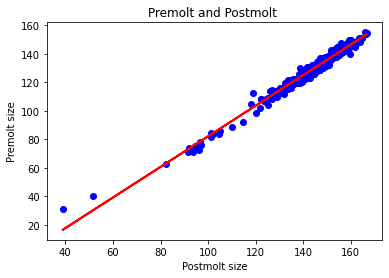

In [14]:
#y dự báo dựa vào phương trình hồi quy
sales_pred = result.predict() # predict
plt.plot(df['postsz'],df['presz'],'o', color = 'b') # plot 
plt.plot(df['postsz'],sales_pred,'r',linewidth=2) # line regression
plt.xlabel('Postmolt size')
plt.ylabel('Premolt size')
plt.title('Premolt and Postmolt ')
plt.show()

### 1. Mô tả dữ liệu IRIS cho bài toán phân loại

In [52]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [68]:
iris= sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [71]:
u, inv = np.unique(iris.species.values, return_inverse=True)

Text(0, 0.5, 'Sepal width')

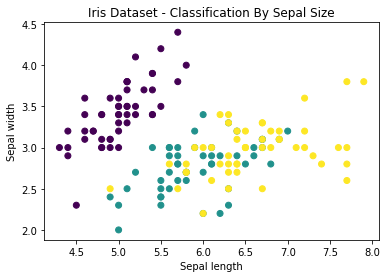

In [77]:
#SCATTERPLOT
# plt.figure()
plt.title('Iris Dataset - Classification By Sepal Size')
plt.scatter(x = 'sepal_length' ,y = 'sepal_width',c=inv, data = iris )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

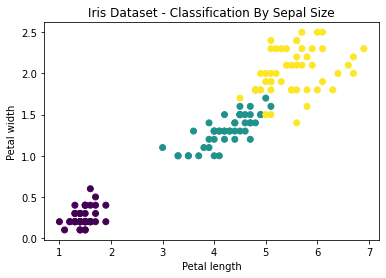

In [78]:
plt.title('Iris Dataset - Classification By Sepal Size')
plt.scatter(x = 'petal_length' ,y = 'petal_width',c=inv, data = iris )
plt.xlabel('Petal length')
plt.ylabel('Petal width')

### 2. Kỹ thuật PCA Decomposition:

In [79]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [80]:
iris = datasets.load_iris()
species = iris.target #species
x_reduced = PCA(n_components=3).fit_transform(iris.data)

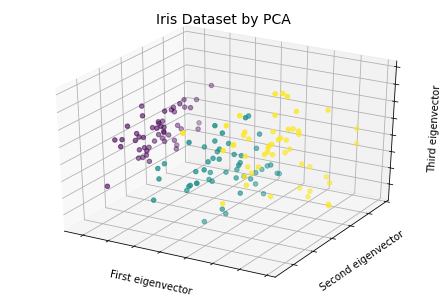

In [81]:
#SCATTERPLOT 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Iris Dataset by PCA', size = 14)
ax.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2], c=species)
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()

### 3. Phân loại với thuật toán K-Nearest Neighbors

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
np.random.seed(0)
iris = datasets.load_iris()
x = iris.data
y = iris.target
i = np.random.permutation(len(iris.data))


In [84]:
x_train = x[i[:-10]]
y_train = y[i[:-10]]
x_test = x[i[-10:]]
y_test = y[i[-10:]]

In [86]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [87]:
knn.predict(x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [88]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [90]:
from matplotlib.colors import ListedColormap

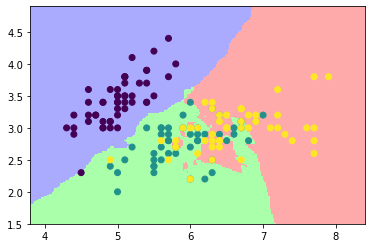

In [91]:
x = iris.data[:,:2] #X-Axis - sepal lenght-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,
h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

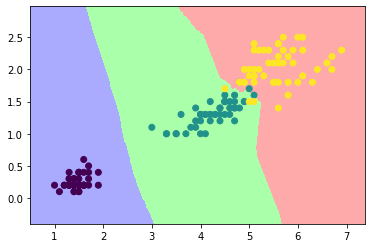

In [92]:
x = iris.data[:,2:4] #X-Axis - petal lenght-width
y = iris.target #Y-Axis - species
x_min, x_max = x[:,0].min() - .5, x[:,0].max() + .5
y_min, y_max = x[:,1].min() - .5, x[:,1].max() + .5
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,
h))
knn = KNeighborsClassifier()
knn.fit(x,y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
#Plot the training points
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()
